In [110]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

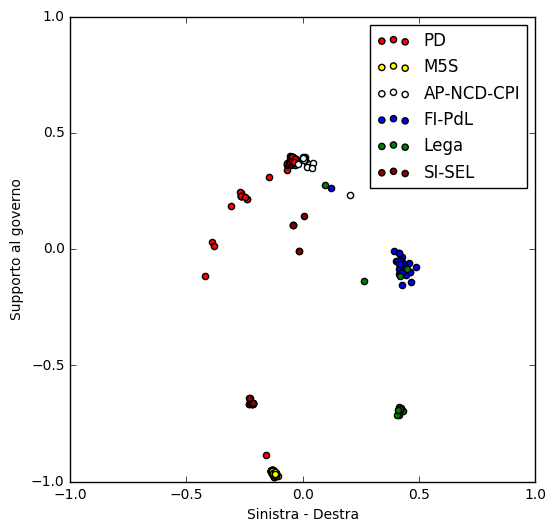

In [218]:
np.seterr(invalid='ignore')

data_pd = pd.read_csv("plot.csv", usecols=(2,13,14))

parties = {"PD":"red","M5S":"yellow","FI-PdL":"blue", "AP-NCD-CPI":"azure", "SI-SEL":"darkred","Lega":"green"}

ax = data_pd[data_pd.party == "PD"].plot(kind='scatter', y='coord1D',x='coord2D', color='red',label="PD", figsize=(6,6))

for party in list(parties)[1:]:
    data_pd[data_pd.party == party].plot(kind='scatter', y='coord1D',x='coord2D',ax=ax, color=parties[party],label=party)

plt.xlabel("Sinistra - Destra")
plt.ylabel("Supporto al governo")
plt.axis([-1,1,-1,1])
plt.legend(loc='best')


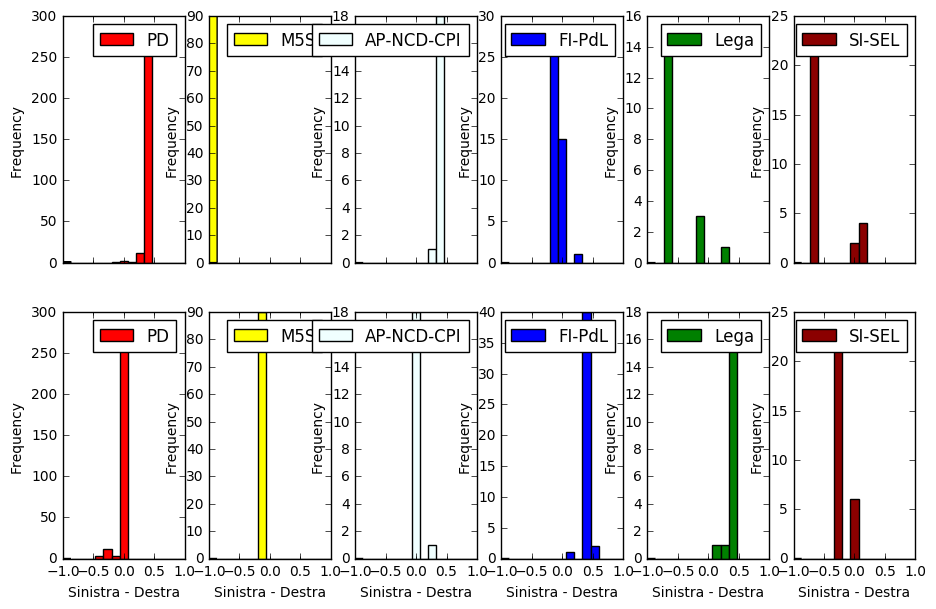

In [245]:
pds = []
f, axes = plt.subplots(2, 6, sharex=True, figsize=(11,7))

for i,party in enumerate(list(parties)):
    selected_pd = data_pd[data_pd.party == party]
    pds.append(selected_pd)
    selected_pd.plot.hist(ax=axes[0][i],y="coord1D", color=parties[party],label=party,bins=15,range=(-1,1))
    axes[0][i].set_xlabel("Supporto al governo")
    selected_pd.plot.hist(ax=axes[1][i],y="coord2D", color=parties[party],label=party,bins=15,range=(-1,1))
    axes[1][i].set_xlabel("Sinistra - Destra")


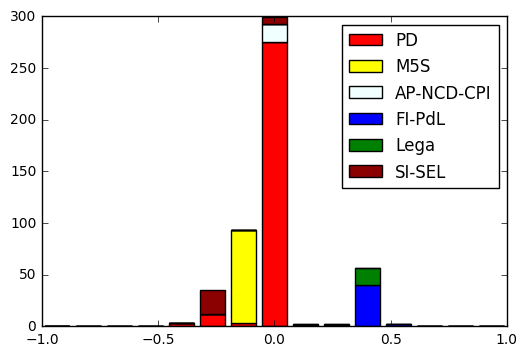

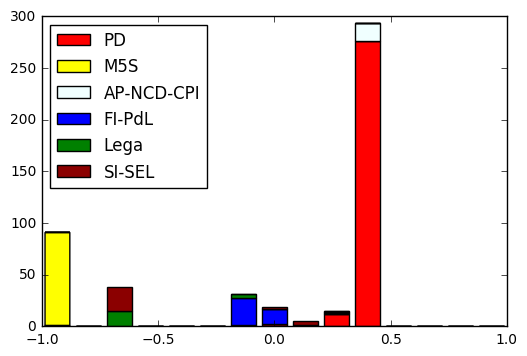

In [247]:

f1 = plt.figure()
plt.hist([party['coord2D'] for party in pds], bins=15, stacked=True,range=(-1,1),color=parties.values(),label=list(parties))
plt.legend(loc='best')

f2 = plt.figure()
plt.hist([party['coord1D'] for party in pds], bins=15, stacked=True,range=(-1,1),color=parties.values(),label=list(parties))
plt.legend(loc='best')
